In [45]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Random selection

In [55]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected_rand = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected_rand.append(ad)
    reward = df.values[n, ad]
    total_reward = total_reward + reward
total_reward

1255

In [56]:

# Visualising the results
def visualisation(ads_selected):
    plt.hist(ads_selected)
    plt.title('Histogram of ads selections')
    plt.xlabel('Ads')
    plt.ylabel('Number of times each ad was selected')
    plt.show()

In [54]:
# Implementing UCB
import math
N=10000
d=10
number_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0
ads_selected_ucb=[]
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(number_of_selections[i]>0):
            avg_reward=sum_of_rewards[i]/number_of_selections[i]
            delta_i=math.sqrt(1.5*math.log(n+1)/number_of_selections[i])
            upper_bound=avg_reward+delta_i
        else:
            upper_bound=1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=i;
            
    ads_selected_ucb.append(ad)
    number_of_selections[ad]+=1
    reward=df.values[n,ad]
    sum_of_rewards[ad]+=reward
    total_reward+=reward
    

ads_selected_ucb

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 7,
 0,
 0,
 6,
 8,
 4,
 0,
 7,
 1,
 1,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 0,
 0,
 7,
 0,
 4,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 7,
 0,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 0,
 7,
 7,
 4,
 7,
 7,
 7,
 1,
 6,
 8,
 0,
 4,
 4,
 2,
 3,
 5,
 9,
 4,
 7,
 0,
 7,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 8,
 4,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 0,
 6,
 4,
 1,
 1,
 1,
 8,
 7,
 2,
 3,
 5,
 9,
 4,
 0,
 1,
 1,
 1,
 6,
 7,
 8,
 4,
 1,
 2,
 3,
 5,
 9,
 0,
 6,
 7,
 8,
 4,
 7,
 1,
 0,
 6,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 1,
 0,
 6,
 6,
 6,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 7,
 0,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 7,
 4,
 8,
 0,
 7,


## Visualisation

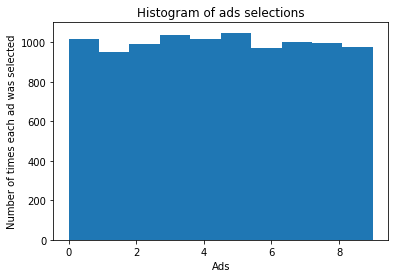

In [57]:
#Visualisation of the results using random selection
visualisation(ads_selected_rand)

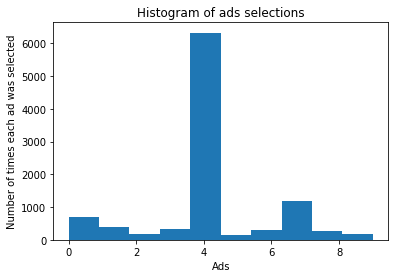

In [58]:
# visualisation of the results using upper confidence bound(ucb)
visualisation(ads_selected_ucb)